In [1]:
import ROOT,os,glob,math

Welcome to JupyROOT 6.18/00


In [9]:
txt="../../code/Txtfile/data13LeadBSR.txt"
f=open(txt,"r")
outxt=list(f.readlines())
print outxt
count=0
for i,j in enumerate(outxt):
    if histname in j:
        print i,j
        count=i
chi2=outxt[count+1].split(" ")[-1].replace("\n","")

['/global/homes/w/wding/zplusx_swifit/eos/data13/SR.root: Zmm_mc_sherpaZ_SR_highZPt100_LeadB_Xmass\n', 'CHI2 p-value of nominal global fit bkg 0.999932\n', '\n', '\n', '\n', '/global/homes/w/wding/zplusx_swifit/eos/data13/SR.root: Zmm_mc_sherpaZ_SR_highZPt100_LeadB_ZXmass\n', 'CHI2 p-value of nominal global fit bkg 0.998697\n', '\n', '\n', '\n', '/global/homes/w/wding/zplusx_swifit/eos/data13/SR.root: Zee_mc_sherpaZ_SR_highZPt100_LeadB_Xmass\n', 'CHI2 p-value of nominal global fit bkg 0.999995\n', '\n', '\n', '\n', '/global/homes/w/wding/zplusx_swifit/eos/data13/SR.root: Zee_mc_sherpaZ_SR_highZPt100_LeadB_ZXmass\n', 'CHI2 p-value of nominal global fit bkg 0.999901\n', '\n', '\n', '\n']
15 /global/homes/w/wding/zplusx_swifit/eos/data13/SR.root: Zee_mc_sherpaZ_SR_highZPt100_LeadB_ZXmass



In [16]:
path="/global/u1/w/wding/zplusx_swifit/output/root/data13LeadBSR/"
files=glob.glob(path+"*root")
#print files
#print files[13],files
path1="/global/homes/w/wding/zplusx_swifit/eos/data13/SR.root"
#Not good:0,1
print files

['/global/u1/w/wding/zplusx_swifit/output/root/data13LeadBSR/Zee_mc_sherpaZ_SR_highZPt100_LeadB_ZXmass.root', '/global/u1/w/wding/zplusx_swifit/output/root/data13LeadBSR/Zmm_mc_sherpaZ_SR_highZPt100_LeadB_Xmass.root', '/global/u1/w/wding/zplusx_swifit/output/root/data13LeadBSR/Zee_mc_sherpaZ_SR_highZPt100_LeadB_Xmass.root', '/global/u1/w/wding/zplusx_swifit/output/root/data13LeadBSR/Zmm_mc_sherpaZ_SR_highZPt100_LeadB_ZXmass.root']


4 /global/u1/w/wding/zplusx_swifit/output/root/data13LeadBSR/Zee_mc_sherpaZ_SR_highZPt100_LeadB_Xmass.root
Zee LeadB Xmass


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file figures2/Zee_mc_sherpaZ_SR_highZPt100_LeadB_Xmass.pdf has been created
Info in <TCanvas::Print>: jpg file figures2/Zee_mc_sherpaZ_SR_highZPt100_LeadB_Xmass.jpg has been created


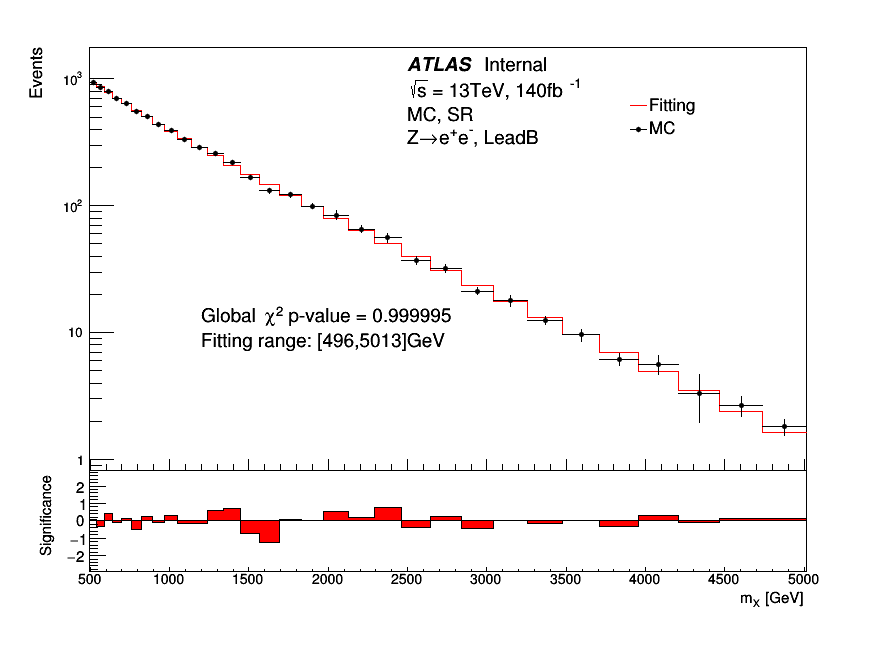

In [24]:
num=2
selectfile=files[num]
print len(files),selectfile
StrTitle=selectfile.split("/")[-1].split("_")
Zem=StrTitle[0]
LeadBJ=StrTitle[5]
MasStr=StrTitle[6].split(".")[0]
print Zem,LeadBJ,MasStr
f=ROOT.TFile(selectfile,"r")
f1=ROOT.TFile(path1,"r")
histname=selectfile.split("/")[-1].split(".")[0]
h1=f.Get("globalFitNominal")
h2=f1.Get(histname)

chi=[0.999901,0.999932,0.999995,0.998697] #LeadB
#chi=[0.996472,0.0687978,0.999744,0.994463] #LeadJ
#chi=[0.991343,0.999916,1,1]
chi2=chi[num]





c1=ROOT.TCanvas("c1","c1",100,0,900,700)
c1.SetLogy()
#c1.SetBottomMargin(0.3)

ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptFit();
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0)  # joins upper and lower plot
pad1.Draw()
pad2 = ROOT.TPad("pad2", "pad2", 0, 0.05, 1, 0.3)
pad2.SetTopMargin(0)  # joins upper and lower plot
pad2.SetBottomMargin(0.4)
pad2.Draw()

if MasStr=="ZXmass":
    Low=474
    High=5095
    #Low=570
    #High=5095
    #Low=793
    #High=5126
if MasStr=="Xmass":
    Low=496
    High=5013
    #Low=588
    #High=5013
    #Low=759
    #High=5050
pad1.cd()
pad1.SetLogy()
h1.SetNameTitle("","")
h1.GetYaxis().SetTitle("Events")
h1.GetXaxis().SetRangeUser(Low,High)
h2.GetXaxis().SetRangeUser(Low,High)
h1.GetYaxis().SetTitle("Events")
#print(h1.GetYaxis().GetTitleSize())
h1.GetYaxis().SetTitleSize(18)
h1.SetLineColor(2)
h1.GetYaxis().SetTitle("Events")
h1.Draw("][ hist")
h2.SetMarkerSize(0.7)
h2.SetMarkerStyle(20)
h2.SetLineColor(1)
h2.Draw("SAME")
t=ROOT.TLegend(0.7,0.7,0.8,0.8)
t.AddEntry(h1,"Fitting","l")
t.AddEntry(h2,"MC","lp")
t.SetBorderSize(0)
t.SetTextSize(0.04)
t.Draw()
l=ROOT.TLatex()
l.SetTextSize(0.045)
l.SetTextAlign(13)

LegendLow=2500
LegendBottom=10e3*1
l.DrawLatex(LegendLow,LegendBottom*0.15,"#it{ATLAS} #bf{Internal}")
l.DrawLatex(LegendLow,LegendBottom*0.1,"#bf{#sqrt{s} = 13TeV, 140fb^{-1}}")
l.DrawLatex(LegendLow,LegendBottom*0.06,"#bf{MC, SR}")
if Zem=="Zee":
    l.DrawLatex(LegendLow,LegendBottom*0.04,"#bf{Z#rightarrowe^{+}e^{-}, LeadB}")
if Zem=="Zmm":
    l.DrawLatex(LegendLow,LegendBottom*0.04,"#bf{Z#rightarrow#mu^{+}#mu^{-}, LeadB}")

    
LowT=10
HighT=1200
l.DrawLatex(HighT,LowT*1.6,"#bf{Global #chi^{2} p-value = "+str(chi2)+"}")
if MasStr=="ZXmass":
    l.DrawLatex(HighT,LowT*1,"#bf{Fitting range: [474,5095]GeV}") #LeadB
    #l.DrawLatex(HighT,LowT*1,"#bf{Fitting range: [570,5095]GeV}") #LeadJ
    #l.DrawLatex(HighT,LowT*1,"#bf{Fitting range: [793,5126]GeV}") #LeadFatJ
if MasStr=="Xmass":
    l.DrawLatex(HighT,LowT*1,"#bf{Fitting range: [496,5013]GeV}")
    #l.DrawLatex(HighT,LowT*1,"#bf{Fitting range: [588,5013]GeV}")
    #l.DrawLatex(HighT,LowT*1,"#bf{Fitting range: [759,5050]GeV}")

pad2.cd()
h3=h2.Clone("h3")
h3.Add(h1,-1)
for i in range(h3.GetNbinsX()+1):
    if h2.GetBinContent(i) > 0 and h1.GetBinContent(i) > 0 :
        sigma=h3.GetBinContent(i)/(math.sqrt(h1.GetBinContent(i)))
        h3.SetBinContent(i,sigma)
        #print(sigma)
        #h3.SetBinContent(i, h3.GetBinContent(i)/(math.sqrt(h1.GetBinContent(i))) )
    else :
        h3.SetBinContent(i, 0 )

h3.SetNameTitle("","")
h3.GetXaxis().SetRangeUser(Low,High)
h3.GetYaxis().SetRangeUser(-2.9,2.9)
if MasStr=="ZXmass":
    h3.GetXaxis().SetTitle("m_{ZX} [GeV]")
if MasStr=="Xmass":
    h3.GetXaxis().SetTitle("m_{X} [GeV]")
h3.GetYaxis().SetTitle("Significance")
h3.SetFillColor(2)
h3.GetXaxis().SetTitleOffset(4)

h3.GetYaxis().SetLabelSize(0.1)
h3.GetYaxis().SetTitleSize(0.1)
h3.GetYaxis().SetTitleOffset(0.3)
h3.GetXaxis().SetLabelSize(0.09)
h3.GetXaxis().SetTitleSize(0.1)
h3.GetXaxis().SetTitleOffset(1)
#print h3.GetYaxis().GetTitleSize(),h3.GetXaxis().GetTitleOffset(),h3.GetYaxis().GetLabelSize()

h3.Draw("][ hist")
axis = ROOT.TGaxis(Low, 0,High , 0, 2000, 8000, 100, "")
axis.Draw()
c1.Draw()
c1.SaveAs("figures2/"+histname+".pdf")
c1.SaveAs("figures2/"+histname+".jpg")

In [73]:
for i in range(h1.GetNbinsX()+5):
    #print i,h.GetBinLowEdge(i)
    print i,h1.GetBinContent(i),h1.GetBinLowEdge(i)

0 555827.4375 239.651162791
1 0.0 350.0
2 0.0 372.0
3 0.0 395.0
4 0.0 420.0
5 0.0 446.0
6 0.0 474.0
7 0.0 504.0
8 0.0 536.0
9 28487.5058594 570.0
10 25102.3574219 607.0
11 22629.9726562 646.0
12 20290.6621094 688.0
13 18118.4746094 733.0
14 16417.4160156 781.0
15 14518.2080078 833.0
16 13023.2226562 888.0
17 11783.828125 947.0
18 10422.8144531 1011.0
19 9300.62890625 1079.0
20 8239.04296875 1152.0
21 7330.80566406 1230.0
22 6460.99609375 1314.0
23 5645.3203125 1404.0
24 4935.97949219 1500.0
25 4269.22021484 1603.0
26 3654.4284668 1713.0
27 3118.78759766 1830.0
28 2627.75708008 1955.0
29 2185.97631836 2088.0
30 1795.13317871 2229.0
31 1454.74243164 2378.0
32 1162.75732422 2535.0
33 920.600219727 2700.0
34 712.905822754 2874.0
35 543.212646484 3056.0
36 408.558074951 3246.0
37 299.811645508 3445.0
38 215.690887451 3652.0
39 152.450683594 3867.0
40 105.07270813 4091.0
41 70.9390563965 4324.0
42 46.4374961853 4568.0
43 29.4809703827 4824.0
44 87.7157745361 5095.0
45 87.7157745361 5205.3488

data_Zee_highZPt100_LeadJ_HTM


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: jpg file figures1/data_Zee_highZPt100_LeadJ_HTM.jpg has been created


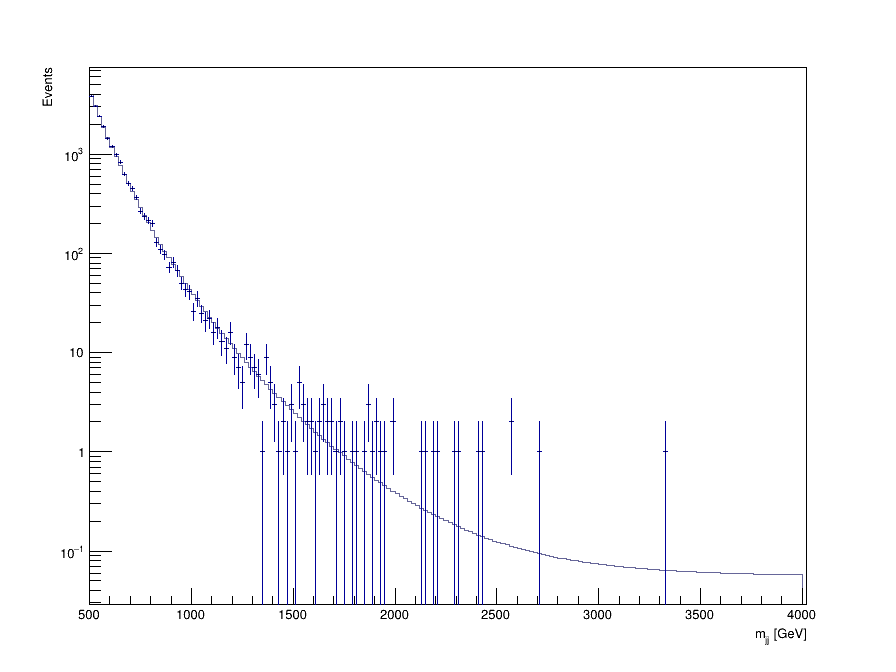

In [71]:
selectfile=files[13]
f=ROOT.TFile(selectfile,"r")
f1=ROOT.TFile(path1,"r")
histname=selectfile.split("/")[-1].split(".")[0]
bkg=f.Get("globalFitAlternate")
data=f1.Get(histname)
print histname
c1=ROOT.TCanvas("c1","c1",100,0,900,700)
c1.SetLogy()
ROOT.gStyle.SetOptStat(0)
c1.cd()
bkg.Draw()
data.Draw("SAME")
c1.Draw()

#c1.SaveAs("figures1/"+histname+".jpg")